In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv('./work/covid.csv')
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


# Análise Exploratória dos Dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [4]:
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000
mean,1.506726,1.215165,76.562952,1.846262,42.622483,50.400692,2.210633,2.280221,2.265029,2.319628,2.145774,2.410030,2.286157,2.138905,2.283765,2.238360,31.573034,1.728651,76.562864
std,0.499955,0.410937,39.058676,0.560939,16.659973,47.501579,5.683523,5.327832,5.334658,5.667381,5.459866,6.489959,5.438405,5.395578,5.393232,5.571901,45.082123,0.658710,39.059060
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000
max,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000


In [5]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


Apos analise breve notam-se alguns pontos que ja podem ser melhorados:
- Datas de 'date_died' 9999-99-99 -> correspodem a NaN
- Colunas categoricas que possuem comportamente atipico:
    - 1 indica True e 2 indica False
    - Existem outras valores possivéis (97, 98, 99) que devem ser tratados futuramente

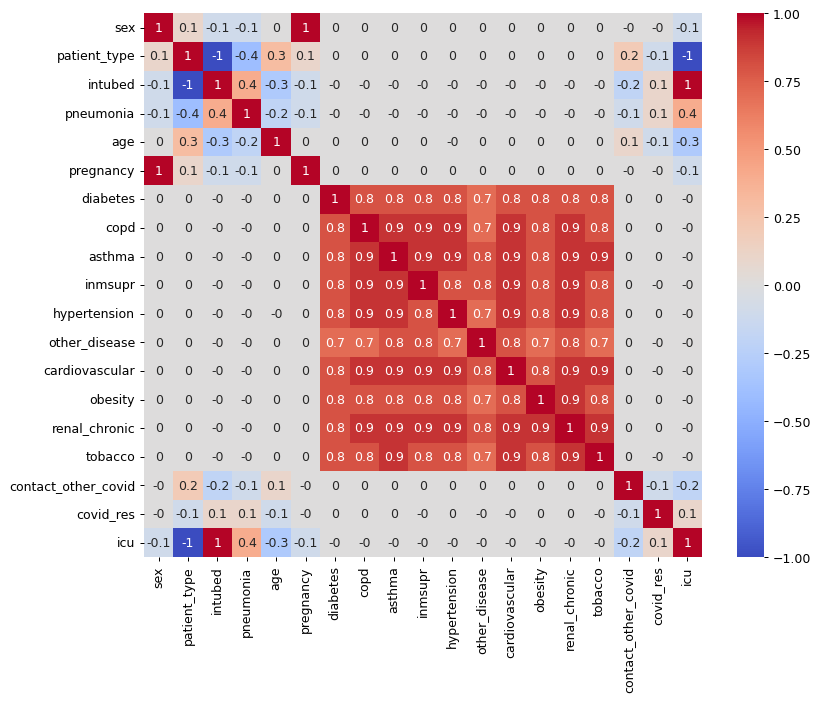

In [6]:
plt.figure(figsize=(10, 8), dpi= 90)
sns.heatmap(df.corr().round(1),
                annot=True, center=0, vmin=-1, vmax=1,
                cmap = "coolwarm")
plt.show()

Existem colunas com alta correlacao, so que depois de fazer o tratamento das colunas categoricas eu rodando o corr novamente, notei q essa correlacao muda bastante. Ao inves de apenas dropar essas colunas eu resolvi avaliar se elas poderao impactar no desempenho

<AxesSubplot:xlabel='age', ylabel='Count'>

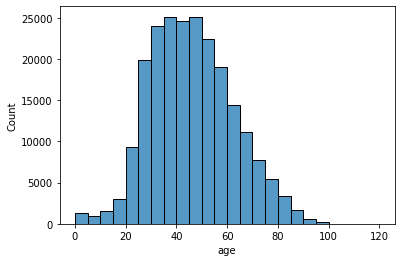

In [7]:
sns.histplot(data=df[df['covid_res'] == 1], x='age', binwidth=5)

# Tratamento de dados

## Tratamento de datas

In [8]:
# convertendo dados de para datetime 
df['entry_date'] = pd.to_datetime(df['entry_date'], format= '%d-%m-%Y')
df['date_symptoms'] = pd.to_datetime(df['date_symptoms'], format= '%d-%m-%Y')

In [9]:
df['date_died'] = df['date_died'].replace({'9999-99-99':np.nan})
df['date_died'] = pd.to_datetime(df['date_died'], format= '%d-%m-%Y')

## Tratamento de colunas categoricas

In [10]:
categorical_cols = ['intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr',
                     'hypertension', 'other_disease', 'cardiovascular', 'obesity', 'renal_chronic', 
                    'tobacco', 'contact_other_covid', 'covid_res', 'icu', 'patient_type']

### Analisando valores 2, 3, 97, 98 e 99

In [11]:
print(df[categorical_cols].apply(lambda col: col.unique()))

intubed                [97, 2, 1, 99]
pneumonia                  [2, 1, 99]
pregnancy              [97, 2, 1, 98]
diabetes                   [2, 1, 98]
copd                       [2, 1, 98]
asthma                     [2, 1, 98]
inmsupr                    [2, 1, 98]
hypertension               [2, 1, 98]
other_disease              [2, 1, 98]
cardiovascular             [2, 1, 98]
obesity                    [2, 1, 98]
renal_chronic              [2, 1, 98]
tobacco                    [2, 1, 98]
contact_other_covid        [2, 99, 1]
covid_res                   [1, 2, 3]
icu                    [97, 2, 1, 99]
patient_type                   [1, 2]
dtype: object


#### Trocando 2 por 0

In [12]:
df[categorical_cols[:-1]] = df[categorical_cols[:-1]].replace({2:0})

#### 3 em covid_res
Esse valor indica pessoas que ainda estao esperando o resultado do teste, nesse caso irei simplesmente dropas as linhas uma vez que leas nao contribuem para aa analise

In [13]:
df = df.drop(df[df['covid_res'] == 3].index)

#### 97 em icu e intubed

In [14]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,2020-05-04,2020-05-02,NaT,97,0,27,97,0,0,0,0,0,0,0,0,0,0,0,1,97
1,1009bf,2,1,2020-03-19,2020-03-17,NaT,97,0,24,97,0,0,0,0,0,0,0,0,0,0,99,1,97
2,167386,1,2,2020-04-06,2020-04-01,NaT,0,0,54,0,0,0,0,0,0,0,0,1,0,0,99,1,0
3,0b5948,2,2,2020-04-17,2020-04-10,NaT,0,1,30,97,0,0,0,0,0,0,0,0,0,0,99,1,0
4,0d01b5,1,2,2020-04-13,2020-04-13,2020-04-22,0,0,60,0,1,0,0,0,1,0,1,0,0,0,99,1,0


In [15]:
df[['icu', 'patient_type', 'intubed']].where(df['icu'] == 97).value_counts()

icu   patient_type  intubed
97.0  1.0           97.0       392146
dtype: int64

Aparentemente 97 nos casos de ICU e Intubed ocorre quando o paciente foi ambulatorio, o que realmente faz sentido, ja que se o paciente nao precisou ser internado ele obviamente nao foi intubado ou precisou de UTI.

In [16]:
df[['icu','intubed']] = df[['icu','intubed']].replace({97:0})

#### 97 em pregnancy

In [17]:
df[['pregnancy','sex']].where(df['pregnancy'] == 97).value_counts()

pregnancy  sex
97.0       2.0    253098
dtype: int64

In [18]:
df['pregnancy'] = df['pregnancy'].replace({97:0})

No caso do 97 em pregnancy se aplica aos homens

#### 98's
Em primeiro mommento vou assumir que os 98 sao relevantes para analise, vou manter eles e tratar como uma categoria valida.

Para futuro vale avaliar dropar eles e reavaliar o modelo

In [19]:
df[categorical_cols].where(df==98).any(axis=1).sum()

4613

#### 99's (NaN's)

In [20]:
df[categorical_cols] = df[categorical_cols].replace({99: np.nan})
df.isna().sum()

id                          0
sex                         0
patient_type                0
entry_date                  0
date_symptoms               0
date_died              465571
intubed                   122
pneumonia                  11
age                         0
pregnancy                   0
diabetes                    0
copd                        0
asthma                      0
inmsupr                     0
hypertension                0
other_disease               0
cardiovascular              0
obesity                     0
renal_chronic               0
tobacco                     0
contact_other_covid    153675
covid_res                   0
icu                       123
dtype: int64

Para 'intubed', 'pneumonia', 'icu', onde ocorrem poucos NaN's, vou usar a moda para dar o fill.

In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df[['intubed', 'pneumonia', 'icu']] = imputer.fit_transform(df[['intubed', 'pneumonia', 'icu']])

Para 'contact_other_covid', onde os NaN's representam uma parte significativa dos dados, vou tratar como uma nova categoria

In [22]:
imputer = SimpleImputer(strategy='constant', fill_value=2)
df[['contact_other_covid']] = imputer.fit_transform(df[['contact_other_covid']])

## Feature engineering

### Feature Died
Se date_died e NaN entao e 0 senao 1

In [23]:
df['died'] = np.where(df['date_died'].isna(), 0, 1)

### Feature entry_symptoms_time
Diferenca entre data do primeiro sintoma e de entrada

In [24]:
df['entry_symptoms_time'] = (df['entry_date'] - df['date_symptoms']).dt.days

In [25]:
np.sort(df['entry_symptoms_time'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 48, 49, 51, 53, 58, 59, 60, 62,
       63, 65, 68, 69, 70, 83, 89, 90], dtype=int64)

### Feature has_disease
Caso tenha qualquer uma das doencas ['diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension', 'cardiovascular', 'obesity', 'renal_chronic'] fica como true

In [26]:
diseases_col = ['diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension','other_disease', 'cardiovascular', 'obesity', 'renal_chronic']
df['has_disease'] = np.where(df[df[diseases_col] == 1].any(axis=1), 0, 1)

# Análise Pt. 2

No inicio da pandemia o numero de infectados, e consequentemente, o numero de teste positivos foi muito baixo, contudo com desenvolvimento esse numero aumenta

<AxesSubplot:xlabel='entry_date', ylabel='covid_res'>

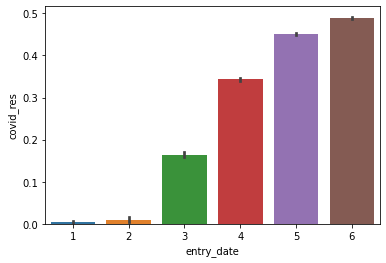

In [27]:
sns.barplot(x=df['entry_date'].dt.month, y=df['covid_res'])

<AxesSubplot:xlabel='entry_date', ylabel='count'>

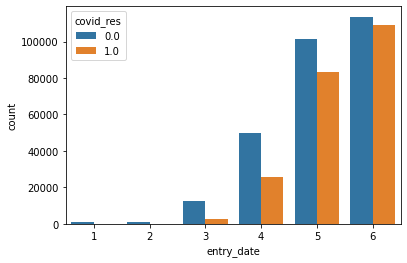

In [28]:
sns.countplot(x=df['entry_date'].dt.month, hue=df['covid_res'])

<AxesSubplot:xlabel='has_disease', ylabel='count'>

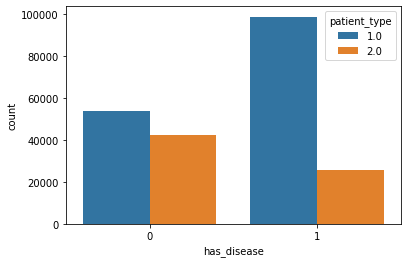

In [29]:
sns.countplot(data=df[df['covid_res'] == 1], x='has_disease', hue='patient_type')

Obs.: em patient_type, 1 indica que e uma paciente de ambulatorio e 2 uma paciente internado

In [30]:
df[df['died'] == 1].covid_res.value_counts()

1.0    27121
0.0     7000
Name: covid_res, dtype: int64

In [31]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,died,entry_symptoms_time,has_disease
0,16169f,2,1.0,2020-05-04,2020-05-02,NaT,0.0,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,2,1
1,1009bf,2,1.0,2020-03-19,2020-03-17,NaT,0.0,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0,2,1
2,167386,1,2.0,2020-04-06,2020-04-01,NaT,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0,5,0
3,0b5948,2,2.0,2020-04-17,2020-04-10,NaT,0.0,1.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0,7,1
4,0d01b5,1,2.0,2020-04-13,2020-04-13,2020-04-22,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1,0,0


# Modelagem
Para avaliar desempenho de nosso modelo nos vamos utilizar a metrica de **recall** e **ROC AUC**. Escolhemos essa metrica porque no caso de doencas infecciosas queremos minimizar os falsos negativos, ja que caso alguem infectado receba um teste negativo ela continuara espalhando a doenca. Pode-se argumentar que os falsos positivos causariam gastos com tratamento e prevencao da doenca, mas no caso do COVID esses gastos sao relativamente baixos, uma vez que um paciente que testou positivo pode ser encaminhado para quarentena em casa.

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [33]:
# Ja dropando colunas que nao serao usadas
X = df.drop(columns=['covid_res', 'id', 'entry_date', 'date_symptoms', 'date_died']) 
y = df['covid_res']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=42)

## Baseline Geral
Um baseline geral para todos modelos seria caso o paciente tenha qualquer outra doenca testar ele como positivo

In [34]:
y_pred = np.where(X_test['has_disease'] == 1, 1, 0)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.49      0.33      0.39     83711
         1.0       0.40      0.56      0.47     66197

    accuracy                           0.43    149908
   macro avg       0.44      0.45      0.43    149908
weighted avg       0.45      0.43      0.43    149908



0.44728335406485653

In [35]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)

SelectKBest(k='all', score_func=<function chi2 at 0x0000019D121544C8>)

In [36]:
for i, val in sorted([(i, val) for i, val in enumerate(fs.scores_)], key=lambda x: x[1]):
	print('Feature %s %d: %f' % (X_train.columns[i], i, fs.scores_[i]))

Feature sex 0: 307.761745
Feature contact_other_covid 16: 1027.150161
Feature icu 17: 1096.738609
Feature has_disease 20: 1533.911564
Feature pregnancy 5: 1641.554150
Feature patient_type 1: 2006.381246
Feature intubed 2: 2034.526180
Feature tobacco 15: 3635.856615
Feature asthma 8: 4116.736960
Feature inmsupr 9: 4203.012774
Feature copd 7: 4214.147445
Feature other_disease 11: 4349.099056
Feature renal_chronic 14: 4596.717986
Feature cardiovascular 12: 5504.306295
Feature hypertension 10: 7525.075801
Feature diabetes 6: 7700.820108
Feature obesity 13: 7948.218637
Feature pneumonia 3: 12028.082276
Feature died 18: 12202.924182
Feature entry_symptoms_time 19: 23583.811034
Feature age 4: 63531.076138


## KNN
best performance -> ROC 0.589

### Modelo 1

In [37]:
# Criando uma pipe generalizada para depois testar diferentes features
modelo = KNeighborsClassifier()

# Selecao das colunas
numeric_features = ['age', 'entry_symptoms_time']
categorical_features = ['sex', 'patient_type', 'pregnancy', 'intubed', 'contact_other_covid', 'icu', 'died', 'has_disease']

# Criacao do tratamento de cada tipo de col
categorical_pipe = Pipeline([
    ('onehot', OneHotEncoder(drop='if_binary'))
])

numeric_pipe = Pipeline([
    ('normalize', StandardScaler())
])

column_processing = ColumnTransformer([
    ('num', numeric_pipe, numeric_features),
    ('cat', categorical_pipe, categorical_features)
])

# Motando a pipe em si
knn_pipe = Pipeline([
    ('preprocessing', column_processing),
    ('model', modelo)
])

In [50]:
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('normalize',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'entry_symptoms_time']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  ['hypertension', 'diabetes',
                                                   'obesity', 'pneumonia',
                                                   'died'])])),
                ('model', KNeighborsClassifier())])

In [39]:
y_pred = knn_pipe.predict(X_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.63      0.68      0.65     83711
         1.0       0.55      0.50      0.52     66197

    accuracy                           0.60    149908
   macro avg       0.59      0.59      0.59    149908
weighted avg       0.60      0.60      0.60    149908



0.5894659707085355

### Modelo 2

In [40]:
categorical_features = ['hypertension', 'diabetes', 'obesity', 'pneumonia', 'died']

In [41]:
column_processing.set_params(transformers=[
    ('num', numeric_pipe, numeric_features),
    ('cat', categorical_pipe, categorical_features)
])

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('normalize',
                                                  StandardScaler())]),
                                 ['age', 'entry_symptoms_time']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='if_binary'))]),
                                 ['hypertension', 'diabetes', 'obesity',
                                  'pneumonia', 'died'])])

In [42]:
knn_pipe.fit(X_train, y_train)
y_pred = knn_pipe.predict(X_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.62      0.67      0.64     83711
         1.0       0.54      0.49      0.51     66197

    accuracy                           0.59    149908
   macro avg       0.58      0.58      0.58    149908
weighted avg       0.58      0.59      0.58    149908



0.5762512771356432

## Random Forest

### Modelo 1

In [43]:
# Criando uma pipe generalizada para depois testar diferentes features
modelo = RandomForestClassifier(random_state=42)

# Selecao das colunas
numeric_features = ['age', 'entry_symptoms_time']
categorical_features = ['sex', 'patient_type', 'pregnancy', 'intubed', 'contact_other_covid', 'icu', 'died', 'has_disease']

# Criacao do tratamento de cada tipo de col
categorical_pipe = Pipeline([
    ('labelenc', OrdinalEncoder())
])

numeric_pipe = Pipeline([
    ('normalize', StandardScaler())
])

column_processing = ColumnTransformer([
    ('num', numeric_pipe, numeric_features),
    ('cat', categorical_pipe, categorical_features)
])

# Motando a pipe em si
rf_pipe = Pipeline([
    ('preprocessing', column_processing),
    ('model', modelo)
])

In [51]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('normalize',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'entry_symptoms_time']),
                                                 ('cat',
                                                  Pipeline(steps=[('labelenc',
                                                                   OrdinalEncoder())]),
                                                  ['sex', 'patient_type',
                                                   'intubed', 'pneumonia',
                                                   'pregnancy', 'diabetes',
                                                   'copd', 'asthma', 'inmsupr',
                                                   'hypertension',
           

In [45]:
y_pred = rf_pipe.predict(X_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.63      0.80      0.71     83711
         1.0       0.62      0.42      0.50     66197

    accuracy                           0.63    149908
   macro avg       0.63      0.61      0.60    149908
weighted avg       0.63      0.63      0.62    149908



0.6079224625703489

### Modelo 2

In [46]:
X_train.columns

Index(['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'icu', 'died', 'entry_symptoms_time',
       'has_disease'],
      dtype='object')

In [47]:
categorical_features = ['sex', 'patient_type', 'intubed', 'pneumonia', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'icu', 'died']
column_processing.set_params(transformers=[
    ('num', numeric_pipe, numeric_features),
    ('cat', categorical_pipe, categorical_features)
])

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('normalize',
                                                  StandardScaler())]),
                                 ['age', 'entry_symptoms_time']),
                                ('cat',
                                 Pipeline(steps=[('labelenc',
                                                  OrdinalEncoder())]),
                                 ['sex', 'patient_type', 'intubed', 'pneumonia',
                                  'pregnancy', 'diabetes', 'copd', 'asthma',
                                  'inmsupr', 'hypertension', 'other_disease',
                                  'cardiovascular', 'obesity', 'renal_chronic',
                                  'tobacco', 'contact_other_covid', 'icu',
                                  'died'])])

In [48]:
rf_pipe.fit(X_train, y_train)
y_pred = rf_pipe.predict(X_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.64      0.77      0.70     83711
         1.0       0.60      0.44      0.51     66197

    accuracy                           0.62    149908
   macro avg       0.62      0.61      0.60    149908
weighted avg       0.62      0.62      0.61    149908



0.6055001305499101

# Otimizacao de modelo

In [52]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('normalize',
                                                     StandardScaler())]),
                                    ['age', 'entry_symptoms_time']),
                                   ('cat',
                                    Pipeline(steps=[('onehot',
                                                     OneHotEncoder(drop='if_binary'))]),
                                    ['hypertension', 'diabetes', 'obesity',
                                     'pneumonia', 'died'])])),
  ('model', KNeighborsClassifier())],
 'verbose': False,
 'preprocessing': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('normalize',
                                                   StandardScaler())]),
                                  ['age', 'entry_symptoms_time']),
                                 ('cat',
         

In [53]:
rf_pipe.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('normalize',
                                                     StandardScaler())]),
                                    ['age', 'entry_symptoms_time']),
                                   ('cat',
                                    Pipeline(steps=[('labelenc',
                                                     OrdinalEncoder())]),
                                    ['sex', 'patient_type', 'intubed', 'pneumonia',
                                     'pregnancy', 'diabetes', 'copd', 'asthma',
                                     'inmsupr', 'hypertension', 'other_disease',
                                     'cardiovascular', 'obesity', 'renal_chronic',
                                     'tobacco', 'contact_other_covid', 'icu',
                                     'died'])])),
  ('model', RandomForestClassifier(random_state=42))],
 'verbose

In [54]:
from sklearn.model_selection import RandomizedSearchCV

knn_hiperparams = {
    'model__n_neighbors':[1,3,5,7,9],
    'model__p': [1,2],
    'model__weights': ['uniform', 'distance']
}

rf_hiperparams = {
    'model__max_depth' : [None, 1, 5, 10, 15, 50],
    'model__min_samples_split' : [2, 10, 50, 100, 500, 1000],
    'model__min_samples_leaf' : [1, 5, 10, 25, 50],
}

In [59]:
knn_rand_search = RandomizedSearchCV(knn_pipe, knn_hiperparams, cv=3, n_iter=10, random_state=42, verbose=10)
# knn_search = knn_rand_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START model__n_neighbors=1, model__p=1, model__weights=uniform...
[CV 1/3; 1/10] END model__n_neighbors=1, model__p=1, model__weights=uniform;, score=0.572 total time= 1.0min
[CV 2/3; 1/10] START model__n_neighbors=1, model__p=1, model__weights=uniform...
[CV 2/3; 1/10] END model__n_neighbors=1, model__p=1, model__weights=uniform;, score=0.544 total time= 1.1min
[CV 3/3; 1/10] START model__n_neighbors=1, model__p=1, model__weights=uniform...
[CV 3/3; 1/10] END model__n_neighbors=1, model__p=1, model__weights=uniform;, score=0.551 total time= 1.0min
[CV 1/3; 2/10] START model__n_neighbors=9, model__p=1, model__weights=distance..
[CV 1/3; 2/10] END model__n_neighbors=9, model__p=1, model__weights=distance;, score=0.589 total time= 1.1min
[CV 2/3; 2/10] START model__n_neighbors=9, model__p=1, model__weights=distance..
[CV 2/3; 2/10] END model__n_neighbors=9, model__p=1, model__weights=distance;, score=0.588 total 

In [60]:
print(knn_rand_search.cv_results_['mean_test_score'].mean().round(3))
print(f'best params: {knn_rand_search.best_params_}')

0.578
best params: {'model__weights': 'uniform', 'model__p': 2, 'model__n_neighbors': 9}


In [63]:
knn_pipe.set_params(model__weights='uniform')
knn_pipe.set_params(model__p=2)
knn_pipe.set_params(model__n_neighbors=9)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('normalize',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'entry_symptoms_time']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  ['hypertension', 'diabetes',
                                                   'obesity', 'pneumonia',
                                                   'died'])])),
                ('model', KNeighborsClassifier(n_neighbors=9))])

In [70]:
knn_pipe.fit(X_train, y_train)
y_pred = knn_pipe.predict(X_test)


print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.63      0.69      0.66     83711
         1.0       0.55      0.48      0.52     66197

    accuracy                           0.60    149908
   macro avg       0.59      0.59      0.59    149908
weighted avg       0.60      0.60      0.60    149908



0.587414684663366

In [72]:
rf_rand_search = RandomizedSearchCV(rf_pipe, rf_hiperparams, cv=3, n_iter=10, random_state=42, verbose=10)
# rf_search = rf_rand_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START model__max_depth=None, model__min_samples_leaf=25, model__min_samples_split=10
[CV 1/3; 1/10] END model__max_depth=None, model__min_samples_leaf=25, model__min_samples_split=10;, score=0.654 total time=  30.5s
[CV 2/3; 1/10] START model__max_depth=None, model__min_samples_leaf=25, model__min_samples_split=10
[CV 2/3; 1/10] END model__max_depth=None, model__min_samples_leaf=25, model__min_samples_split=10;, score=0.652 total time=  29.8s
[CV 3/3; 1/10] START model__max_depth=None, model__min_samples_leaf=25, model__min_samples_split=10
[CV 3/3; 1/10] END model__max_depth=None, model__min_samples_leaf=25, model__min_samples_split=10;, score=0.656 total time=  32.3s
[CV 1/3; 2/10] START model__max_depth=1, model__min_samples_leaf=10, model__min_samples_split=2
[CV 1/3; 2/10] END model__max_depth=1, model__min_samples_leaf=10, model__min_samples_split=2;, score=0.618 total time=   8.3s
[CV 2/3; 2/10] START mo

In [ ]:
print(knn_rand_search.cv_results_['mean_test_score'].mean().round(3))
print(f'best params: {knn_rand_search.best_params_}')
knn_pipe.set_params(model__weights='uniform')
knn_pipe.set_params(model__p=2)
knn_pipe.set_params(model__n_neighbors=9)
knn_pipe.fit(X_train, y_train)
y_pred = knn_pipe.predict(X_test)


print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

In [73]:
print(rf_rand_search.cv_results_['mean_test_score'].mean().round(3))
print(f'best params: {rf_rand_search.best_params_}')

0.646
best params: {'model__min_samples_split': 100, 'model__min_samples_leaf': 10, 'model__max_depth': None}


In [74]:
rf_pipe.set_params(model__min_samples_split=100)
rf_pipe.set_params(model__min_samples_leaf=10)
rf_pipe.set_params(model__max_depth=None)

rf_pipe.fit(X_train, y_train)
y_pred = rf_pipe.predict(X_test)


print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.65      0.82      0.73     83711
         1.0       0.67      0.44      0.53     66197

    accuracy                           0.66    149908
   macro avg       0.66      0.63      0.63    149908
weighted avg       0.66      0.66      0.64    149908



0.6336588292389579

# Rascunhos

In [ ]:
df.head()

In [ ]:
df['month'] = df['entry_date'].dt.month

In [ ]:
temp_df = df[['month', 'covid_res']].groupby(by=['month', 'covid_res']).size().to_frame().reset_index()
temp_df = temp_df.pivot(index='month', columns='covid_res')[0].reset_index()
temp_df

In [ ]:
temp_df['infetec_ratio'] = temp_df[1] / (temp_df[0] + temp_df[1])
temp_df

In [ ]:
sns.barplot(data=temp_df, y='infetec_ratio', x='month')